<a href="https://colab.research.google.com/github/ishankarve/upgrad_lending_club_case_study/blob/main/Ishan%20Karve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim of the Study
##### Find the drivig factors/ variables behind loan default. i.e find out variables tha are strong indicators of a default. 

###### Major parts that need to be done are
1. Data Understandng
2. Data Cleaning
3. Data Analysis
4. Recommendations

###### Steps to Data Cleaning
1. Check Percentage of Missing Values
2. Remove columns with high missing percentages
3. Impute data in columns with acceptable missing percentages
4. Drop rows where missing percentage is very high

###### Steps to data analysis
1. Identify variables that are related to the applicant
2. Identify loan characteristics
3. Indetify customer behaviour variables.
4. Get rid if rows were loan status is 'current'
5. Since customer behivaiour variables are not available at application time, get rid of them too, however, retain those which are available via credit bureau


#### Import Libraries and setup environment

In [175]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
#prevent pandas from truncating output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [177]:
#read the given data file using pandas to a dataframe
loan = pd.read_csv("https://github.com/ishankarve/upgrad_lending_club_case_study/raw/main/loan.csv",engine='python')

#### Get information about the dataset

In [178]:
#get the shape of the data frame
loan.shape

(39717, 111)

In [179]:
#get the list of columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [180]:
#sample the dataframe
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [181]:
#get list of unique variables per column
print(loan.nunique())


id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [182]:
# get count of non-na values across all columns
loan.apply(lambda x: x.count(), axis=0)

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


### Start cleaning the data

In [183]:
#check if data has more than one loan per customer
loan.member_id.value_counts().sum()-loan.id.count()
## The data base has one unique loan per customer

0

##### Create individual dataframes based on loan status

In [184]:
#get list of loan statuses
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [185]:
#drop all columns where count is zero
loan.dropna(how='all', axis=1, inplace=True)
#drop all columns where number of unique values is only one
for col in loan.columns:
    if (loan[col].nunique()==1):
        loan.drop([col], axis = 1,inplace=True)


In [186]:
#drop columns as there are substantial amount of na values or data that cannot be statistically analysed easily
#url                    - Redundant for analysis
#desc                   - Too much of textual data for meaningful statistical analysis. 
#id                     - not relevant for analysis
#member_id              - not relevant for analysis
#loan_amnt              - Redundant for analysis
#funded_amnt            - Redundant for analysis
#title                  - Too much of textual data for meaningful statistical analysis.
#emp_title              - Too much of textual data for meaningful statistical analysis.
#mths_since_last_record - behaviourial data, not relevant for analysis
#mths_since_last_delinq - behaviourial data, not relevant for analysis
#next_pymnt_d           - behaviourial data, not relevant for analysis
#delinq_2yrs            - data not generated at the time of application
#total_pymnt            - data not available at the time of application
#total_pymnt_inv        - data not available at the time of application
#total_rec_prncp        - data not available at the time of application
#total_rec_int          - data not available at the time of application
#total_rec_late_fee     - data not available at the time of application
#recoveries             - data not available at the time of application
#collection_recovery_fee- data not available at the time of application
#last_pymnt_d           - data not available at the time of application
#last_pymnt_amnt        - data not available at the time of application
#last_credit_pull_d     - data not available at the time of application

In [187]:
loan.drop(['url','desc','id','member_id','loan_amnt','funded_amnt','title','emp_title','mths_since_last_record','mths_since_last_delinq','next_pymnt_d','delinq_2yrs','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis = 1,inplace=True)


In [188]:
loan.apply(lambda x: x.count(), axis=0)

funded_amnt_inv         39717
term                    39717
int_rate                39717
installment             39717
grade                   39717
sub_grade               39717
emp_length              38642
home_ownership          39717
annual_inc              39717
verification_status     39717
issue_d                 39717
loan_status             39717
purpose                 39717
zip_code                39717
addr_state              39717
dti                     39717
earliest_cr_line        39717
inq_last_6mths          39717
open_acc                39717
pub_rec                 39717
revol_bal               39717
revol_util              39667
total_acc               39717
out_prncp               39717
out_prncp_inv           39717
pub_rec_bankruptcies    39020
dtype: int64

#### Start Cleaning actual data within columns

In [189]:
#check term column
loan.term.value_counts()
#remove the text month and convert the column to int
loan.term=loan.term.apply(lambda x : int(x.replace(" months", "")))
#check again
loan.term.value_counts()

#remove the percentage sign and convert the column to float
loan.int_rate=loan.int_rate.apply(lambda x : float(x.replace("%", "")))
loan.revol_util=loan.revol_util.apply(lambda x : float(str(x).replace("%", ""))) # giving an error due to float, hence the string conversion
#pandas convert datetime fileds 
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y') #date is in Dec-11 format
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y') #date is in Dec-11 format

In [190]:
#split date fields for better analysis
loan['issue_d_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_year']=pd.DatetimeIndex(loan['issue_d']).year

In [191]:
#split date fields for better analysis
loan['earliest_cr_line_month']=pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_line_year']=pd.DatetimeIndex(loan['earliest_cr_line']).year

In [192]:
#delete all rows where loan status is current
loan=loan[(loan.loan_status!="Current")]

In [193]:
#check emplouyment length field and alterdata for meaningful statistical analyis
#remove the text years
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" years", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" year", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("10+", "10"))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("< 1", "0"))
loan.emp_length.value_counts()                 


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: emp_length, dtype: int64

In [194]:
#convert loan_status to a binary value column
loan.loan_status=loan.loan_status.apply(lambda x : 1 if x=="Fully Paid" else 0)

In [195]:
print(loan.nunique())

funded_amnt_inv            8050
term                          2
int_rate                    370
installment               15022
grade                         7
sub_grade                    35
emp_length                   12
home_ownership                5
annual_inc                 5215
verification_status           3
issue_d                      55
loan_status                   2
purpose                      14
zip_code                    822
addr_state                   50
dti                        2853
earliest_cr_line            524
inq_last_6mths                9
open_acc                     40
pub_rec                       5
revol_bal                 21275
revol_util                 1088
total_acc                    82
out_prncp                     1
out_prncp_inv                 1
pub_rec_bankruptcies          3
issue_d_month                12
issue_d_year                  5
earliest_cr_line_month       12
earliest_cr_line_year        53
dtype: int64


In [196]:
#create sub dataframe based on loan status filter
loan_fully_paid=loan[(loan.loan_status==1)]
loan_charged_off=loan[(loan.loan_status==0)]


### Undertake analysis

In [197]:
loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,1,credit_card,860xx,AZ,27.65,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,0.0,12,2011,1,1985
1,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,0,car,309xx,GA,1.00,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,0.0,12,2011,4,1999
2,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,1,small_business,606xx,IL,8.72,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,0.0,12,2011,11,2001
3,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,1,other,917xx,CA,20.00,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,0.0,12,2011,2,1996
5,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,1,wedding,852xx,AZ,11.20,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,0.0,12,2011,11,2004


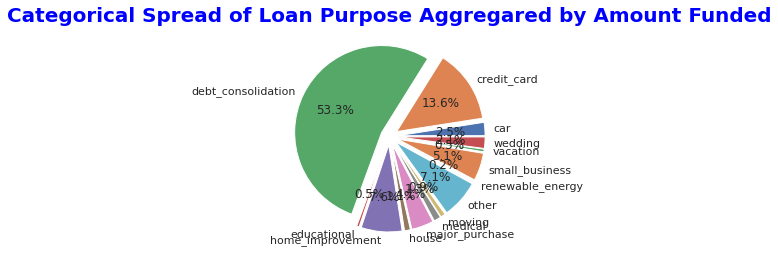

In [198]:
#undertake categorical analysis of home ownership  and loan purpose vis-a-vis loan_status

# plotting pie chart for different types of purpose
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

loan_purpose_df = loan.groupby('purpose')[['funded_amnt_inv']].sum()
plt.pie(loan_purpose_df['funded_amnt_inv'],labels = loan_purpose_df.index, autopct = '%1.1f%%',explode = explode)

plt.title("Categorical Spread of Loan Purpose Aggregared by Amount Funded",
     color = 'blue', fontweight = 'bold', fontsize = '20')
plt.show()


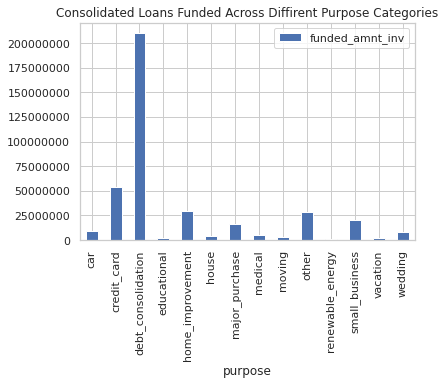

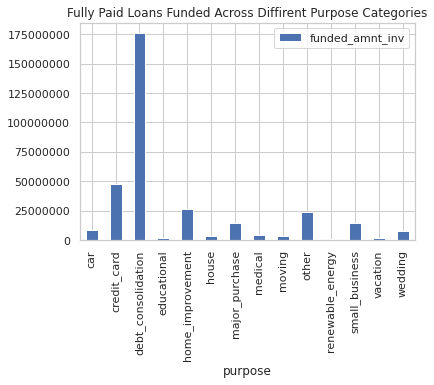

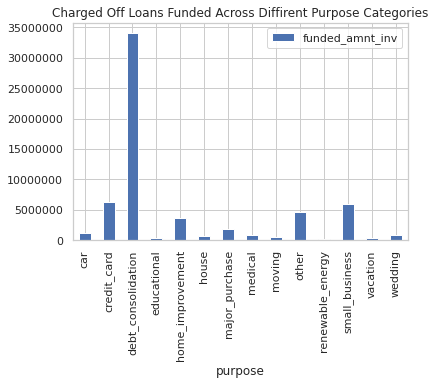

In [199]:
loan_purpose_df_consolidated = loan.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_paidoff = loan_fully_paid.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_defaulted = loan_charged_off.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Across Diffirent Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

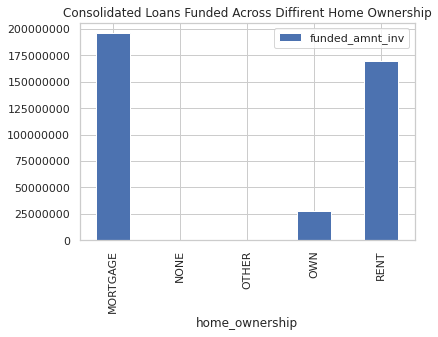

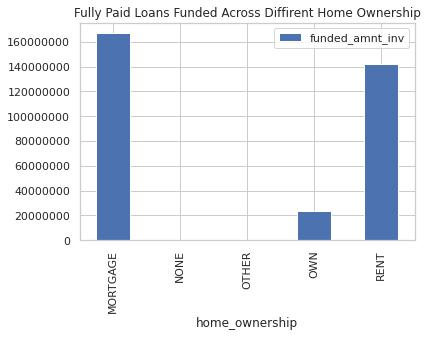

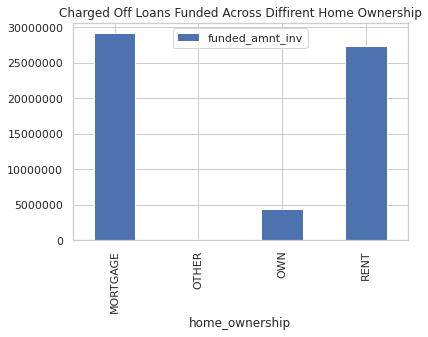

In [200]:
loan_purpose_df_consolidated = loan.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title="Consolidated Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_paidoff = loan_fully_paid.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


loan_purpose_df_defaulted = loan_charged_off.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

##### Analyse impact of state and zip code on loan default


loan_status            0            1  %default of total default  %defalt of Loan disbursal
addr_state                                                                                 
NE              0.162499     0.388542                        0.0                       29.0
SD             13.917500    43.285071                        0.0                       24.0
NV            114.309711   364.807239                        2.0                       24.0
AK             19.540407    68.928862                        0.0                       22.0
UT             49.587642   204.655093                        1.0                       20.0
FL            505.771461  2200.431015                        8.0                       19.0
WA            145.313609   664.969282                        2.0                       18.0
NJ            318.082474  1604.969760                        5.0                       17.0
OR             74.327973   351.390048                        1.0                

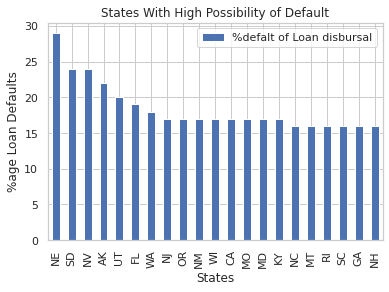

In [201]:
#analyse impact of state on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='addr_state',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
state_default=raw_table[raw_table["%defalt of Loan disbursal"]>15].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (state_default)
#plot relevant graphs
state_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='States', y='%defalt of Loan disbursal')
plt.title("States With High Possibility of Default")
plt.show()

loan_status         0         1  %default of total default  %defalt of Loan disbursal
zip_code                                                                             
438xx        3.161106  1.100000                        0.0                       74.0
746xx        5.297500  1.919300                        0.0                       73.0
496xx        4.095000  1.712500                        0.0                       71.0
673xx        1.200000  0.496058                        0.0                       71.0
561xx        4.509597  1.962500                        0.0                       70.0
203xx        1.575000  0.715000                        0.0                       69.0
608xx        4.677500  2.176444                        0.0                       68.0
215xx        2.200000  1.110000                        0.0                       66.0
371xx        0.960000  0.486209                        0.0                       66.0
668xx        2.500000  1.315000                       

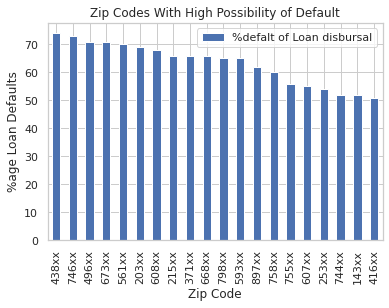

In [202]:
#analyse impact of zipcode on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='zip_code',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
zip_default=raw_table[raw_table["%defalt of Loan disbursal"]>50].sort_values(by='%defalt of Loan disbursal', ascending=False)
print (zip_default)
#plot relevant graphs
zip_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Zip Code', y='%defalt of Loan disbursal')
plt.title("Zip Codes With High Possibility of Default")
plt.show()

##### Analyse impact of loan purpose on loan default



loan_status                   0             1  %default of total default  %defalt of Loan disbursal
purpose                                                                                            
small_business       585.444310   1444.905545                       10.0                       29.0
educational           36.589579    145.870416                        1.0                       20.0
renewable_energy      14.399654     62.479715                        0.0                       19.0
medical               85.779975    432.055454                        1.0                       17.0
other                463.938806   2344.855589                        8.0                       17.0
debt_consolidation  3408.223495  17613.126275                       56.0                       16.0
house                 70.016359    363.699906                        1.0                       16.0
vacation              29.910826    162.800680                        0.0                       16.0


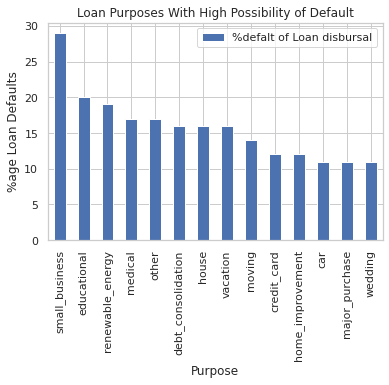

In [203]:
#analyse impact of purpose on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
purpose_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (purpose_default)
#plot relevant graphs
purpose_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Purpose', y='%defalt of Loan disbursal')
plt.title("Loan Purposes With High Possibility of Default")
plt.show()

In [204]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

#### Analyse impact of verification on loan default

loan_status             0      1  %default of total default  %defalt of Loan disbursal
verification_status                                                                   
Verified             2051  10155                       36.0                       17.0
Source Verified      1434   8243                       25.0                       15.0
Not Verified         2142  14552                       38.0                       13.0


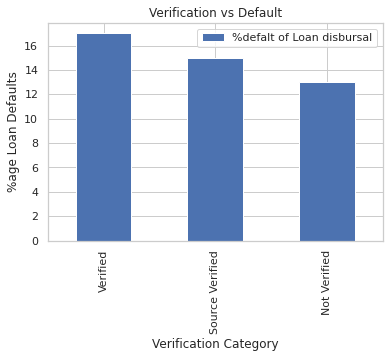

In [205]:
#analyse impact of verification on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='verification_status',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
verification_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))
print (verification_default)
#plot relevant graphs
verification_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Verification Category', y='%defalt of Loan disbursal')
plt.title("Verification vs Default")
plt.show()

#### Analyse impact of loan grade on default

loan_status            0             1  %default of total default  %defalt of Loan disbursal
grade                                                                                       
A             441.974198   7742.303800                        7.0                        5.0
B            1388.838582  10452.996513                       23.0                       12.0
C            1314.487469   6401.156013                       22.0                       17.0
D            1215.562461   4491.693123                       20.0                       21.0
E            1024.339567   2777.616785                       17.0                       27.0
F             558.753605   1062.364411                        9.0                       34.0
G             169.510267    393.668636                        3.0                       30.0


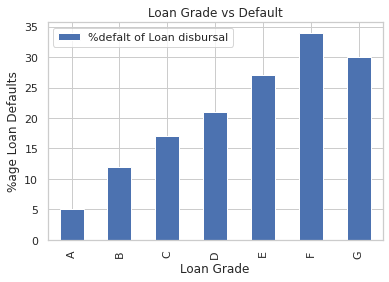

In [206]:
#analyse impact of loan grade rating on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='grade',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
loan_grade_default=(raw_table.sort_values(by='grade', ascending=True))
print (loan_grade_default)
#plot relevant graphs
loan_grade_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Loan Grade', y='%defalt of Loan disbursal')
plt.title("Loan Grade vs Default")
plt.show()

loan_status           0            1  %default of total default  %defalt of Loan disbursal
sub_grade                                                                                 
F5           103.962321   106.589469                        2.0                       49.0
F4            96.992345   148.889053                        2.0                       39.0
G3            32.608680    52.444542                        1.0                       38.0
G5            16.637432    36.076576                        0.0                       32.0
F1           162.578799   339.602457                        3.0                       32.0
G2            46.062962   100.716229                        1.0                       31.0
G1            54.581942   121.754863                        1.0                       31.0
F2           111.051688   260.558081                        2.0                       30.0
F3            84.168451   206.725351                        1.0                       29.0

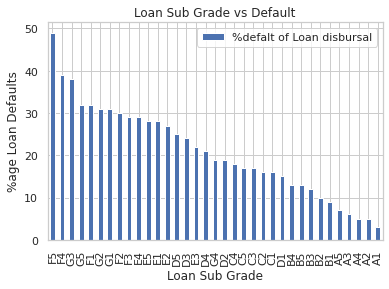

<Figure size 21600x576 with 0 Axes>

In [207]:
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index=['sub_grade'],columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
loan_sub_grade_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))

print (loan_sub_grade_default)
#plot relevant graphs
loan_sub_grade_default.plot(kind='bar', ylabel='%age Loan Defaults', xlabel='Loan Sub Grade', y='%defalt of Loan disbursal')
plt.title("Loan Sub Grade vs Default")
plt.figure(figsize=(300,8))
plt.show()

#### Analyse impact of employment tenure on default

loan_status            0            1  %default of total default  %defalt of Loan disbursal
emp_length                                                                                 
nan           191.463485   646.708744                        3.0                       23.0
10           1760.297043  8365.373798                       29.0                       17.0
7             312.436364  1551.215145                        5.0                       17.0
0             571.965440  3312.162201                        9.0                       15.0
3             577.530230  3366.339706                        9.0                       15.0
5             507.884734  2825.525137                        8.0                       15.0
6             343.863582  1957.058736                        6.0                       15.0
8             236.718875  1323.043183                        4.0                       15.0
1             400.691554  2434.170747                        7.0                

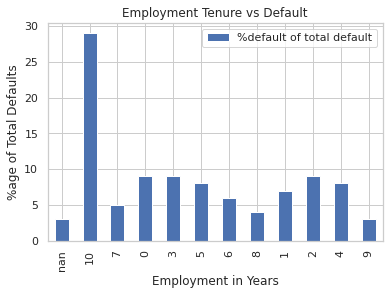

In [208]:
#analyse impact of employment tenure on percentage of total loan paid
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='emp_length',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%defalt of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
emply_default=(raw_table.sort_values(by='%defalt of Loan disbursal', ascending=False))

print (emply_default)
#plot relevant graphs
emply_default.plot(kind='bar', ylabel='%age of Total Defaults', xlabel='Employment in Years', y='%default of total default')
plt.title("Employment Tenure vs Default")
plt.show()

#### Undertake binning of data for sets with too much diversity

In [209]:
#undertake binning for loan amount
loan.funded_amnt_inv.describe()
bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000']
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
loan['funded_amnt_inv_binned'] = pd.cut(loan['funded_amnt_inv'], bins=bins, labels=bin_labels)


In [210]:
#undertake binning for interest rate
loan.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
loan['int_rate_binned'] = pd.cut(loan['int_rate'], bins=bins, labels=bin_labels)


In [211]:
#undertake binning for annual income
loan.annual_inc.describe()
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
loan['annual_inc_binned'] = pd.cut(loan['annual_inc'], bins=bins, labels=bin_labels)


In [212]:
#undertake binning for debt to income ratio
loan.dti.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [-1, 5, 10, 15, 20, 25, 30]
loan['dti_binned'] = pd.cut(loan['dti'], bins=bins, labels=bin_labels)


In [213]:
loan.revol_bal.describe()
#undertake binning for revolviong balance ratio
loan.revol_bal.describe()
bin_labels = ['0-25K', '25K-50K','50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K+']
bins = [-1, 25000, 50000, 75000, 100000, 125000, 150000, 175000]
loan['revol_bal_binned'] = pd.cut(loan['revol_bal'], bins=bins, labels=bin_labels)


In [214]:
#undertake binning for issue_d month
bin_labels = ['Q1', 'Q2','Q3', 'Q4']
bins = [0, 1, 4, 8, 12]
loan['issue_d_month_binned'] = pd.cut(loan['issue_d_month'], bins=bins, labels=bin_labels)


#### Undertake Analysis of binned quantities

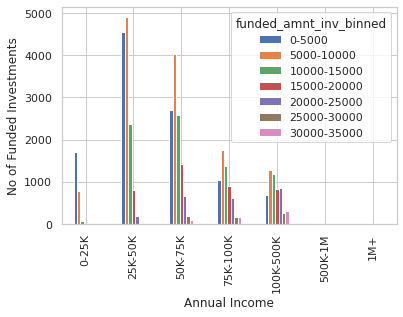

In [234]:
#analyse impact of annual income on funded loan amount
raw_table=pd.pivot_table(loan, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No of Funded Investments', xlabel='Annual Income')


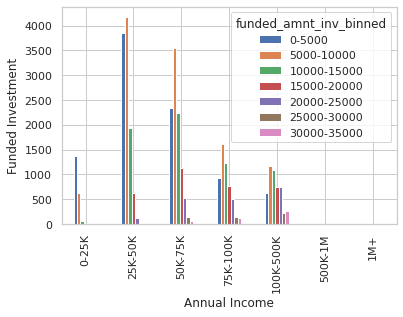

In [216]:
loan_defaulted=loan[loan.loan_status == 1]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No of Funded Investments', xlabel='Annual Income')


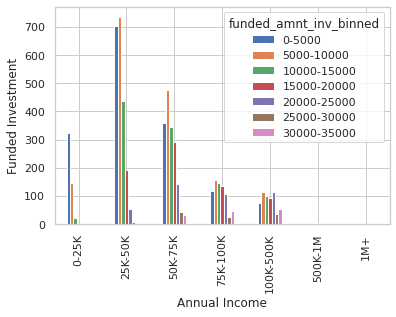

In [217]:
loan_defaulted=loan[loan.loan_status == 0]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No of Funded Investments', xlabel='Annual Income')

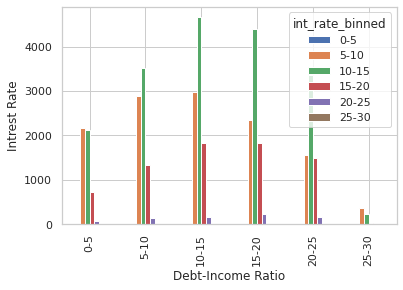

In [218]:
#undertake assessment of relationship between dti and intrest rate
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='dti_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Intrest Rate', xlabel='Debt-Income Ratio')


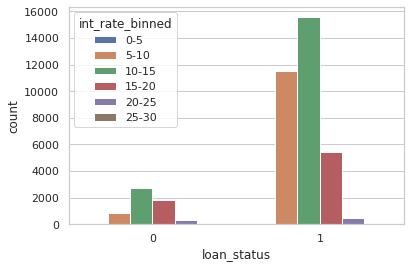

In [219]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "int_rate_binned", data = loan)
 # Show the plot
plt.show()

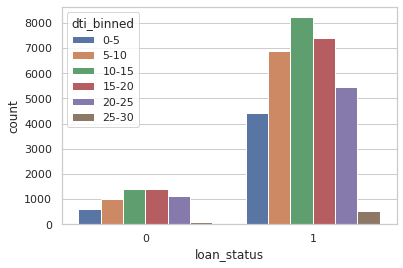

In [220]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "dti_binned", data = loan)
 # Show the plot
plt.show()

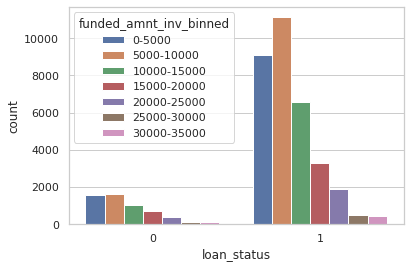

In [221]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "funded_amnt_inv_binned", data = loan)
 # Show the plot
plt.show()

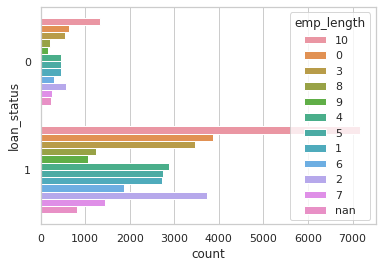

In [222]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "emp_length", data = loan)
 # Show the plot
plt.show()

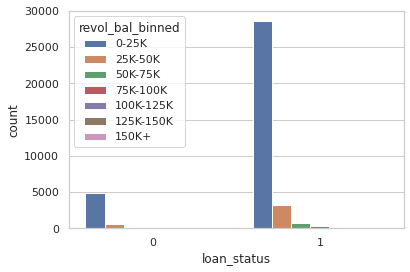

In [223]:
# count plot on two categorical variable
sns.countplot(x ='loan_status', hue = "revol_bal_binned", data = loan)
 # Show the plot
plt.show()

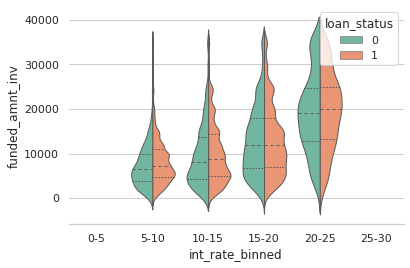

In [224]:
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=loan, x="int_rate_binned", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart", linewidth=1,
               palette="Set2")
sns.despine(left=True)

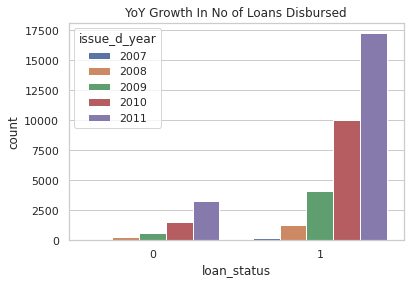

In [225]:
# Pattern of loan disbursement
sns.countplot(x ='loan_status', hue = "issue_d_year", data = loan)
plt.title("YoY Growth In No of Loans Disbursed")

 # Show the plot
plt.show()

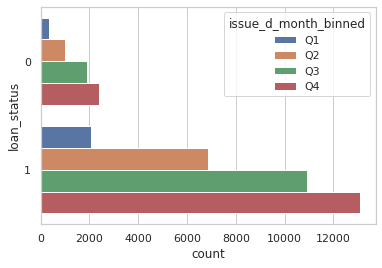

<Figure size 7200x576 with 0 Axes>

In [226]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "issue_d_month_binned", data = loan)
plt.figure(figsize=(100,8))

 # Show the plot
plt.show()

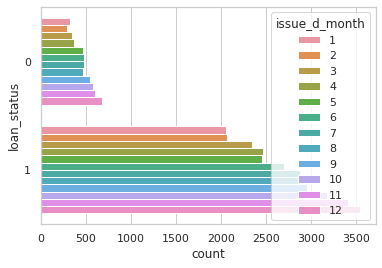

<Figure size 7200x576 with 0 Axes>

In [227]:
# count plot on two categorical variable
sns.countplot(y ='loan_status', hue = "issue_d_month", data = loan)
plt.figure(figsize=(100,8))
# Show the plot
plt.show()

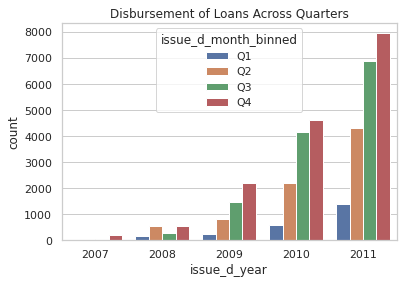

In [228]:
# Pattern of Loan Disbursement
sns.countplot(x ='issue_d_year', hue = "issue_d_month_binned", data = loan)
plt.title("Disbursement of Loans Across Quarters")
# Show the plot
plt.show()

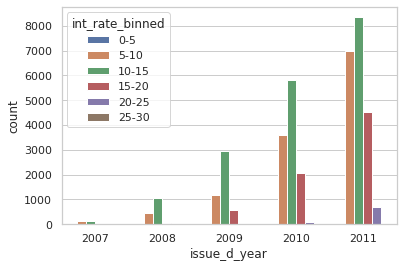

<Figure size 7200x1440 with 0 Axes>

In [229]:
# count plot on two categorical variable
sns.countplot(x ='issue_d_year', hue = "int_rate_binned", data = loan)
plt.figure(figsize=(100,20))
# Show the plot
plt.show()

              funded_amnt_inv
issue_d_year                 
2007                30.697600
2008               503.836072
2009              4109.677558
2010             11359.600818
2011             23431.453382


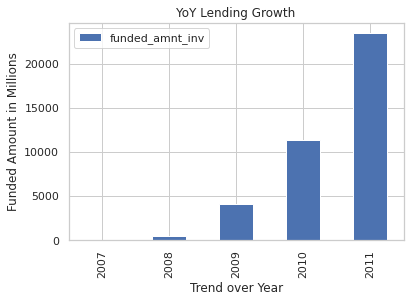

In [235]:
#find YoY lending pattern of Lending club
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Lending Growth")
plt.show()

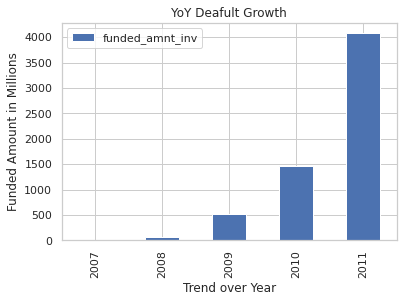

In [231]:
#find YoY defaulting pattern of Lending club
func=lambda x : np.sum(x)/10000
loan_charged_off=loan[(loan.loan_status==0)]
raw_table=pd.pivot_table(loan_charged_off, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Deafult Growth")
plt.show()

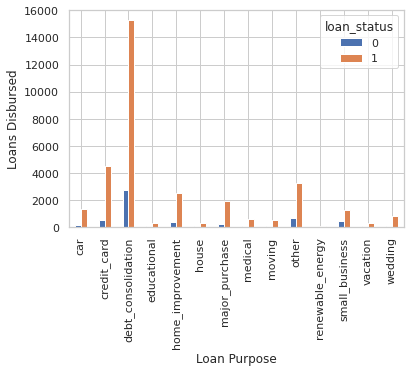

In [232]:
#undertake assessment of relationship between purpose and loan default
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed', xlabel='Loan Purpose')
plt.show()

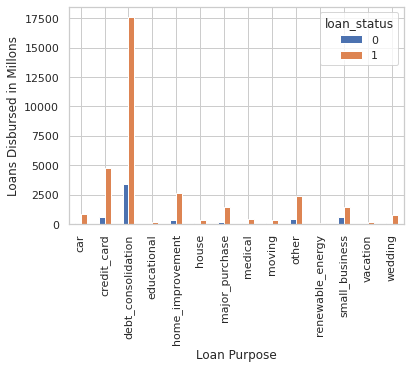

In [233]:
#undertake assessment of relationship between purpose and loan default by value
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Loan Purpose')
plt.show()

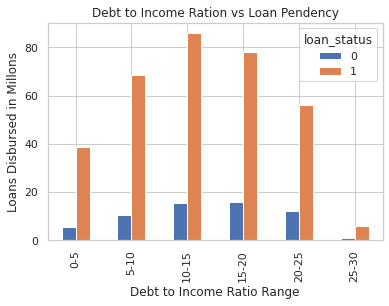

In [247]:
#undertake assessment of relationship between purevol_balrpose and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='dti_binned',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Debt to Income Ratio Range')
plt.title("Debt to Income Ration vs Loan Pendency")
plt.show()

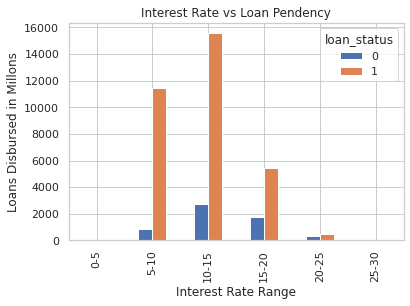

In [250]:
#undertake assessment of relationship between intrest rate and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Loan Pendency")
plt.show()

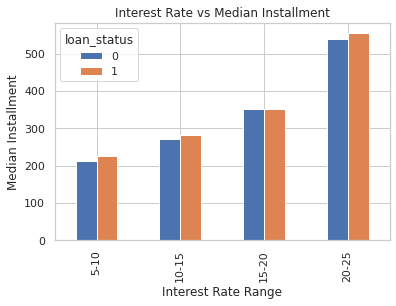

In [255]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='installment',aggfunc=np.median)
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

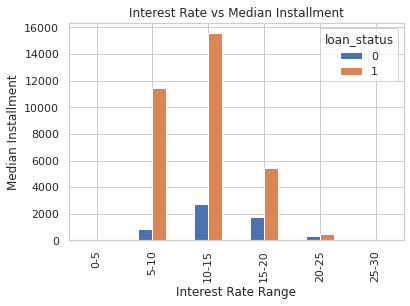

In [256]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='installment',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

#### Undertake Multivariate Analysis

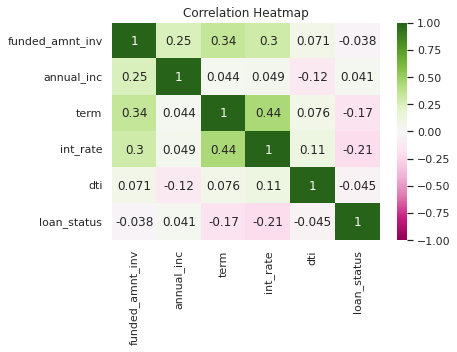

In [261]:
#based on analysis above and factors found to be affecting undertake multivariate analysis
# plot heat map to see correlation between features
columns_of_interest = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "purpose", "addr_state", "zip_code", "dti", 'loan_status']
loan_corr = loan[columns_of_interest].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="PiYG")
plt.title("Correlation Heatmap")
plt.show()